In [1]:
from google.cloud import vision
from google.cloud import storage
from PIL import Image
import numpy as np
import os, sys
from helper import *
import csv  
from io import BytesIO

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/Users/jordan/Desktop/Guppies_Home/guppies-test-f7e2b73324f8.json"

### Read all files from the google bucket. Can cycle through the files in this list and write results to the csv file.

In [55]:
all_files = ListAvaliableFiles("guppy_images")

Files have been read.


### Opens a file from the google bucket (or locally, depends if using RetreiveImage (cloud) or LoadImage (local)), crops it, reads it and corrects the output.

In [3]:
file = '1301/Caigual/21A/101NCD60/DSC_1056.JPG'
image = RetreiveImage(file, verbose=True)

# file = '/Users/jordan/Desktop/Guppies/Data/raw/DSC_1053.JPG'
# image = LoadImage(file)

cropped_image = CroppedImage(image, verbose=True)
output_string, word_confidences = ReadImage(cropped_image, verbose=True)
label = FindErrors(output_string, verbose=True)
print("Initial label:", output_string,
      "\nCorrected label:", label)


Image has been read from google bucket.

Image has been cropped.

Output: FCA-IRGY-R6-01/21/13 
Confidence: 0.48875694068179004

Removing special characters from the output string (e.g. '.', '|').
Character F is fine.
Character C is fine.
Character A is fine.
Character - is fine.
Character I is fine.
Character R is fine.
Character G is fine.
Character Y is fine.
Character - is fine.
Character R is fine.
Character 6 is fine.
Character - is fine.
Character 0 is fine.
Character 1 is fine.
Character / is fine.
Character 2 is fine.
Character 1 is fine.
Character / is fine.
Character 1 is fine.
Character 3 is fine.

Removing paragraphs without three (3), four (4), five (5) or eight (8) elements.
Paragraph removed: R6
Length of removed paragraph: 2
Label after removing dead paragraphs: ['FCA', 'IRGY', '01/21/13']

Correct number of paragraphs.

Looking for errors in the title (FCA).
Final title: FCA

Looking for errors in the identity (IRGY).
Replacing erroneous letter (I) at index 0 with a 

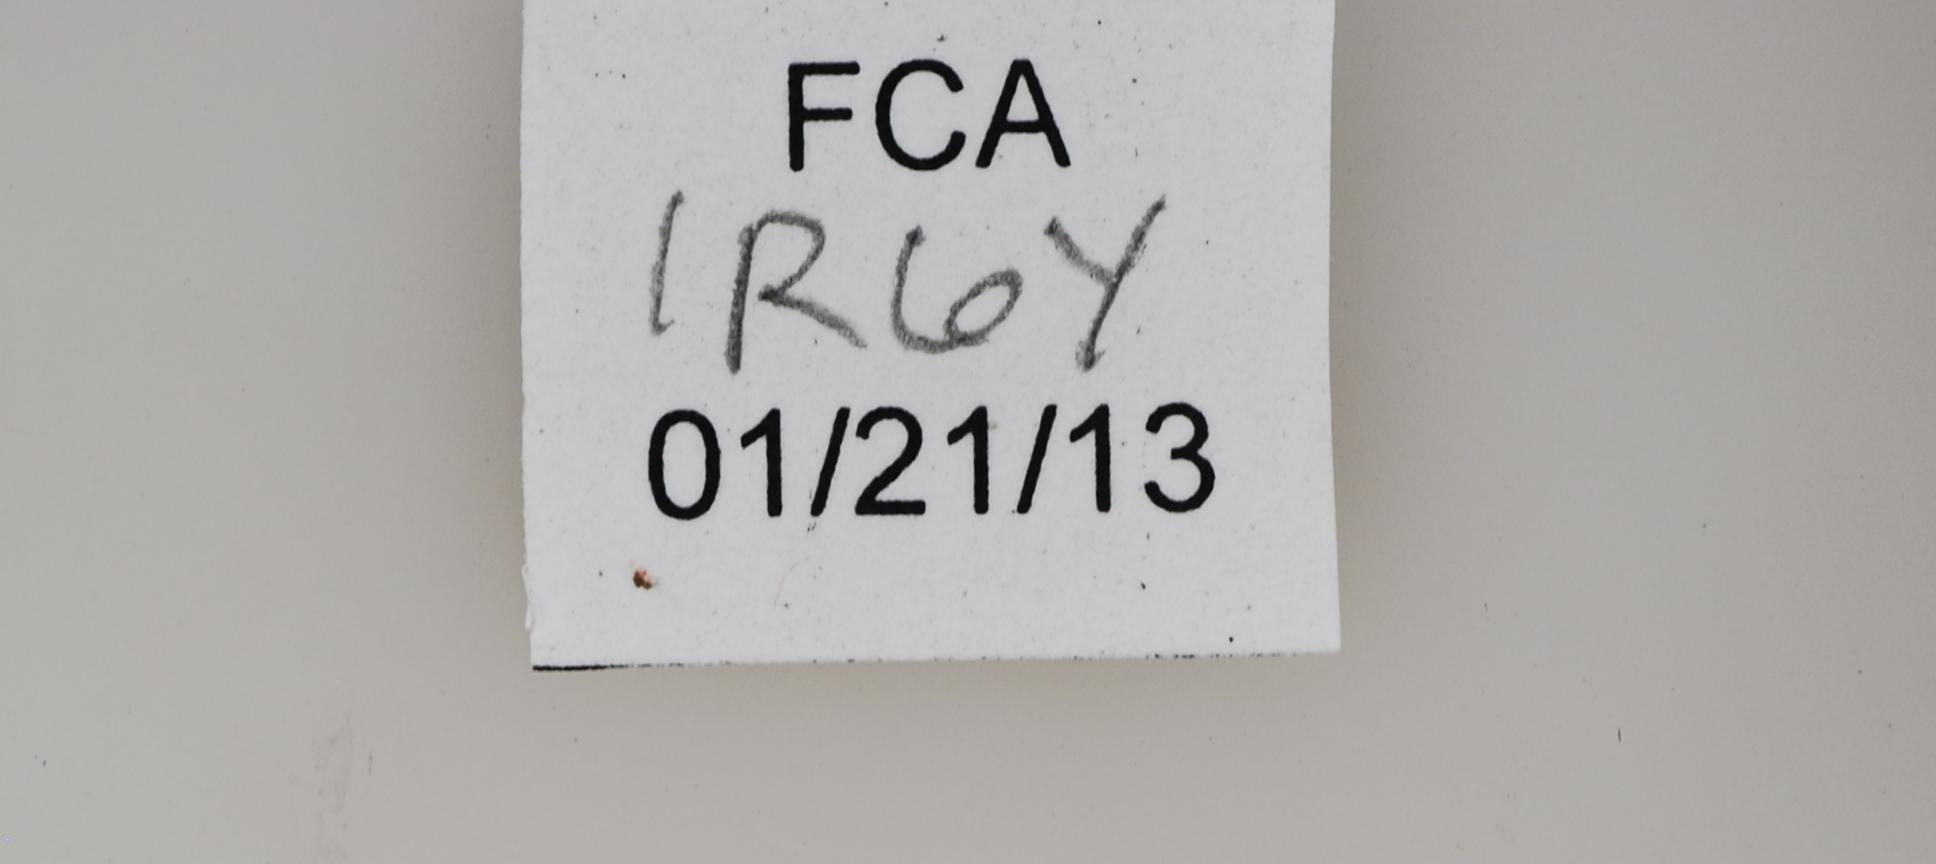

In [4]:
Image.open(cropped_image)

### Write filename, initial prediction and corrected prediction to csv file for a set of file names.

In [4]:
with open('../Data/predictions.csv', 'w') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(['filename', 'prediction', 'corrected'])

    for i in range(len(all_files)):    
        print(f'{i}/{len(all_files)}',end='\r')
        # write the data
        prediction = ReadImage(all_files[i], verbose=False)[0]

        corrected_prediction = FindErrors(prediction)

        writer.writerow([all_files[i], prediction, corrected_prediction])